# Classification using  Logistic Regression 

In this notebook logistic regression based model has been created for a telecommunication company to predict what's the probability that it's cutomers will leave for a competitor, so that they can take some action to retain the cutomers.

# Difference between Logistic and Linear Regression

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the __most probable class__ for that data point. For this, we use __Logistic Regression__.

__Linear regression__ finds a function that relates a continuous dependent variable, __y__, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:

$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots $$

and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:

$$
ℎ_\theta(𝑥) = \theta^TX
$$


Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$


In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability.

The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


# Import Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing 
%matplotlib inline

# Dataset

# Load Dataset

In [37]:
churn_data=pd.read_csv('ChurnData.csv')
churn_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# Data Preprocessing

In [38]:
churn_data=churn_data[['tenure','age','address','income','ed','employ','equip',   'callcard', 'wireless','churn']]
churn_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [39]:
print(churn_data.shape)

print(churn_data.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')



__Define independet variable X and dependent variable Y.__


In [40]:
X = np.asarray(churn_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [41]:
Y=np.asarray(churn_data[['churn']])
Y[0:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

### Normalization

In [42]:
from sklearn import preprocessing
X=preprocessing.StandardScaler ().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

## Splitting Data into Train , Test 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25, random_state=4)

print("Train Data :", X_train.shape, Y_train.shape)

print("Test Data :", X_test.shape, Y_test.shape)

Train Data : (150, 7) (150, 1)
Test Data : (50, 7) (50, 1)


# Outline and Train Model

In [44]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)
model

C:\Users\S BL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Testing Model

In [45]:
Y_predict=model.predict(X_test)

Y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [46]:
Y_predict_prob=model.predict_proba(X_test)

Y_predict_prob

array([[0.54, 0.46],
       [0.6 , 0.4 ],
       [0.56, 0.44],
       [0.62, 0.38],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.6 , 0.4 ],
       [0.42, 0.58],
       [0.62, 0.38],
       [0.57, 0.43],
       [0.61, 0.39],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.65, 0.35],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.48, 0.52],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.53, 0.47],
       [0.63, 0.37],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.69, 0.31],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.7 , 0.3 ],
       [0.67, 0.33],
       [0.51, 0.49],
       [0.43, 0.57],
       [0.7 , 0.3 ],
       [0.59, 0.41],
       [0.63, 0.37],
       [0.41, 0.59],
       [0.52, 0.48],
       [0.65, 0.35],
       [0.51, 0.49],
       [0.65, 0.35],
       [0.5 , 0.5 ],
       [0.58, 0.42],
       [0.56, 0.44],
       [0.65, 0.35],
       [0.49, 0.51],
       [0.74, 0.26],
       [0.68,

# Evaluation of Model Performance

## 1. Jaccard index

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test,Y_predict)

0.78

In [48]:
from sklearn.metrics import classification_report, confusion_matrix


## 2. Confusion Matrix

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, Y_predict, labels=[1,0]))

[[ 7  9]
 [ 2 32]]


Confusion matrix, without normalization
[[ 7  9]
 [ 2 32]]


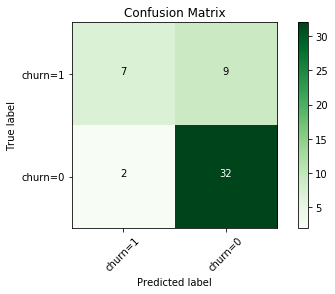

In [50]:
#compute Confusion matrix

confusion_matrix=confusion_matrix(Y_test, Y_predict,labels=[1,0])

np.set_printoptions(precision=2)

#Plot non_normalized confusion matrix

plt.figure()

plot_confusion_matrix(confusion_matrix,classes=['churn=1','churn=0'],normalize=False,title='Confusion Matrix')

In [64]:
print(classification_report(Y_test,Y_predict))


             precision    recall  f1-score   support

        0.0       0.78      0.94      0.85        34
        1.0       0.78      0.44      0.56        16

avg / total       0.78      0.78      0.76        50



# Log Loss

In [52]:
from sklearn.metrics import log_loss
log_loss(Y_test,Y_predict_prob)

0.5829524462491935